In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [5]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [6]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


Data Quality Issues Identified
Duplicated records: 541 duplicates were found in the dataset.

Incomplete information: Columns like house_rules and licence contain insufficient entries.

Formatting issues in numeric fields:

price and service_fee values include dollar signs and commas.
Column names for these fields don’t specify the currency.
Missing values: Several records contain null or missing data.

Incorrect data types: Columns such as price, service_fee, id, host_id, last_review, and construction_year are assigned inappropriate data types.

Spelling errors: In the neighbourhood_group column, "Brooklyn" is misspelled in some records.

Outliers: Unusual values were detected in the availability_365 column.

Data Cleaning
Here is the list of steps:

Drop duplicated records.

Remove columns with insufficient data: Drop the house_rules and licence columns.

Clean numeric fields:

Remove all dollar signs from the price and service_fee columns.
Remove all commas from the price and service_fee columns.
Rename columns: Update the price and service_fee column names to include a dollar sign.

Handle missing values: Drop all records with missing values.

Fix data types: Convert mismatched data types to their correct formats.

Correct spelling errors: Change 'brookln' to 'Brooklyn' in the neighbourhood_group column.

Remove outliers: Eliminate unusual values in the availability_365 column.

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

Remove All Dollar **Sign**

In [9]:
# Convert to string first, then remove $ and commas, then convert back to numeric
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Convert to numeric (int or float)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce')

**Remove all commas**

In [10]:
# Remove commas from 'price' and 'service fee' and convert to numeric
df['price'] = pd.to_numeric(df['price'].astype(str).str.replace(',', '', regex=False), errors='coerce')
df['service fee'] = pd.to_numeric(df['service fee'].astype(str).str.replace(',', '', regex=False), errors='coerce')

**Rename columns**

In [11]:
df.rename(columns = {
    'price': 'price_$',
    'service fee': 'service fee_$'
}, inplace = True)

**Handle missing values**

In [12]:
df.dropna(inplace = True)

**Fix data types**

In [13]:
df['price_$'] = df['price_$'].astype(float)
df['service fee_$'] = df['service fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = df['last review'].astype(int)
df['Construction year'] = df['Construction year'].astype(int)

**Correct spelling errors**

In [14]:
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

**Remove outliers**

In [15]:
df = df.drop(df[df['availability 365'] > 500].index)

In [16]:
df.duplicated().value_counts()

,count
False,83389


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              83389 non-null  object 
 1   NAME                            83389 non-null  object 
 2   host id                         83389 non-null  object 
 3   host_identity_verified          83389 non-null  object 
 4   host name                       83389 non-null  object 
 5   neighbourhood group             83389 non-null  object 
 6   neighbourhood                   83389 non-null  object 
 7   lat                             83389 non-null  float64
 8   long                            83389 non-null  float64
 9   country                         83389 non-null  object 
 10  country code                    83389 non-null  object 
 11  instant_bookable                83389 non-null  float64
 12  cancellation_policy             8338

**EXPLORATORY DATA ANALYSIS (EDA)**
Exploratory Data Analysis (EDA) is a vital phase in data analysis, involving the examination and visualization of data to uncover patterns, trends, and insights.

In the context of an Airbnb data analysis project, EDA allows researchers to gain a comprehensive understanding of the dataset's characteristics, distribution, and relationships between variables.

Key techniques in EDA include:

Summary statistics: Mean, median, mode, standard deviation, and percentiles to understand the distribution of data.
Data visualization: Histograms, box plots, scatter plots, and bar charts to identify patterns and outliers.
Correlation analysis: Examining relationships between variables using correlation matrices and heatmaps.
Missing value analysis: Identifying and quantifying gaps in the dataset.
Outlier detection: Detecting unusual data points that may affect analysis or modeling.
Through these techniques, EDA sets the stage for further investigation and hypothesis testing, guiding subsequent analytical decisions.

In [18]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,8.338900e+04,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,1.560030e+18,1.377352,3.278694,7.032894,141.746369
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,5.001405e+16,1.751091,1.283678,29.555458,133.377544
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,1.341965e+18,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,1.540426e+18,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,1.560384e+18,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,1.562285e+18,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,1.653091e+18,90.000000,5.000000,332.000000,426.000000


**What Are The Different Property Types In The Dataset**

In [19]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


***Room Type Count Plotted on A Barchart***

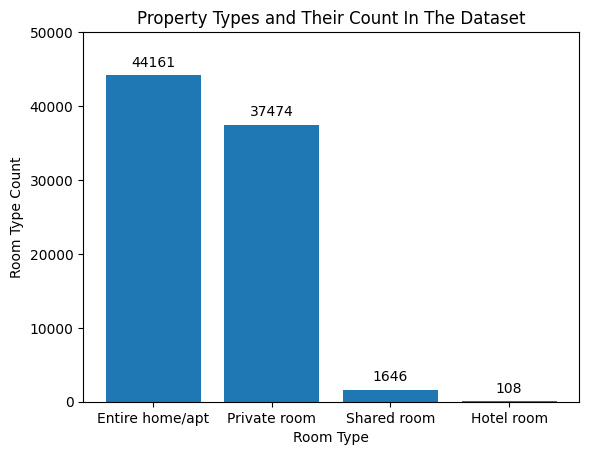

In [20]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:, "count"], padding = 4);
plt.ylim([0, 50000])
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and Their Count In The Dataset');

**Property/Room Types**
The Airbnb open dataset reveals four distinct property or room types. These categories include:

Entire home/apt
Private room
Shared room
Hotel room
Notably, the bar chart illustrates that:

Entire home/apt dominates the dataset with 44,161 occurrences.
Private room follows with 37,474 occurrences.
Shared room and Hotel room trail behind with 1,646 and 108 occurrences, respectively.

In [21]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


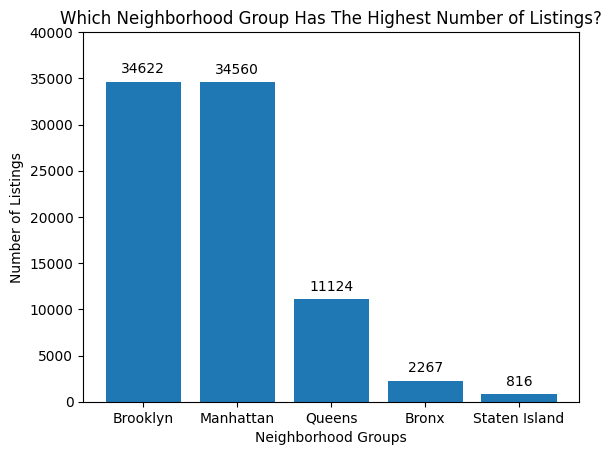

In [22]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, label = hood_group.loc[:,"count"], padding = 4);
plt.ylim([0, 40000]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');
plt.title('Which Neighborhood Group Has The Highest Number of Listings?');

**Neighborhood Groups**
The dataset contains five different neighborhood groups, namely:

Brooklyn
Manhattan
Queens
Bronx
Staten Island
According to the bar chart:

Brooklyn has the highest number of listings with 34,622.
Manhattan follows closely with 34,560.

**Which neighborhood group have highest average price for Airbnb listings?**

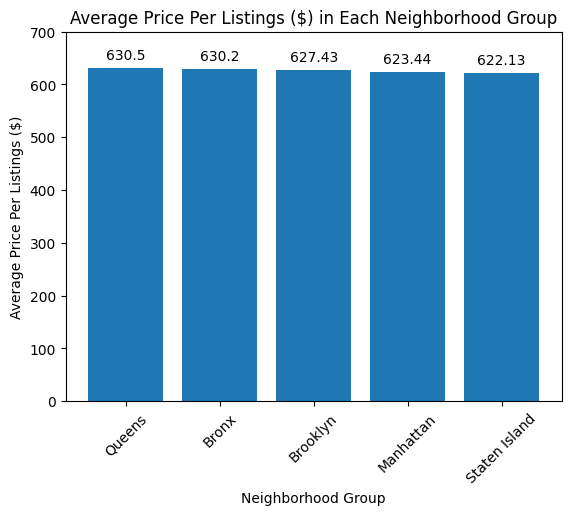

In [23]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price_$']);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:, "price_$"], 2), label_type = 'edge', padding = 4);
plt.ylim([0, 700]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price Per Listings ($)');
plt.xticks(rotation = 45);
plt.title('Average Price Per Listings ($) in Each Neighborhood Group');

**Average Listing Prices by Neighborhood Group**
Among the five identified neighborhood groups in the dataset:

Queens boasts the highest average listing price at 630.5 USD.
Bronx follows closely with an average listing price of 630.2 USD.
Staten Island records the lowest average listing price at 622.13 USD

**Is There Any Relation Between The Construction Year of Property And Price?**

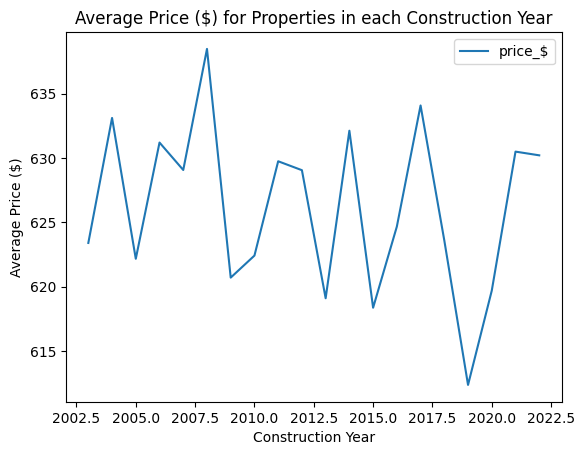

In [24]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

**Construction Year vs. Average Price**
The line plot depicting the construction year of properties versus the average price per property reveals a noticeable downward trend in prices as the construction years progress.
The pattern demonstrates decreasing lows and highs, suggesting an overall decline in property prices over time.

**Who are the top 10 hosts by calculated host listing count?**

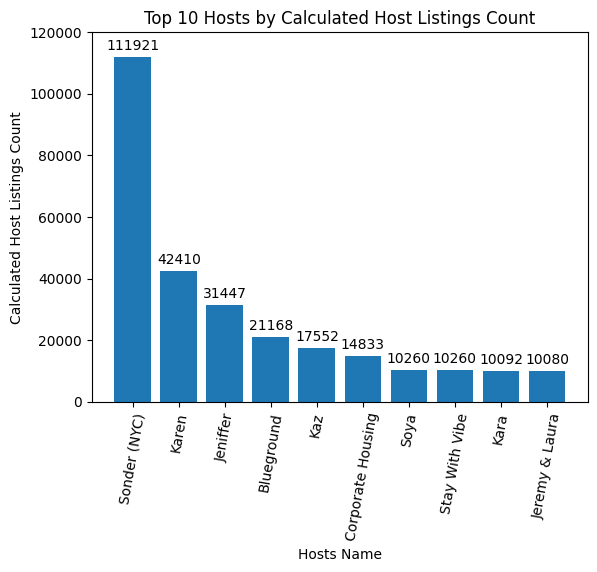

In [25]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count']);
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated Host Listings Count');

**Top 10 Hosts by Listing Count**

The bar chart above illustrates the top 10 hosts based on the calculated listing count, with Sonder (NYC) notably leading with 111,921 listings. Subsequently, the other hosts follow in descending order:

Karen – 42,410 listings
Jeniffer – 31,447 listings
Blueground – 21,168 listings
Kaz – 17,552 listings
Corporate Housing – 14,833 listings
Soya – 10,260 listings
Stay with Vibe – 10,260 listings
Kara – 10,092 listings
Jeremy and Laura – 10,080 listings

**Are host with verified identities more likely to receive positive reviews?**

In [26]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284066
unconfirmed,3.273325


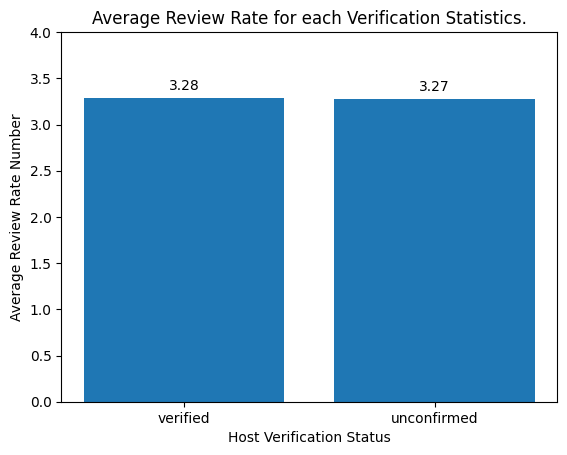

In [27]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:, "review rate number"], 2), padding = 4);
plt.ylim([0, 4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics.');

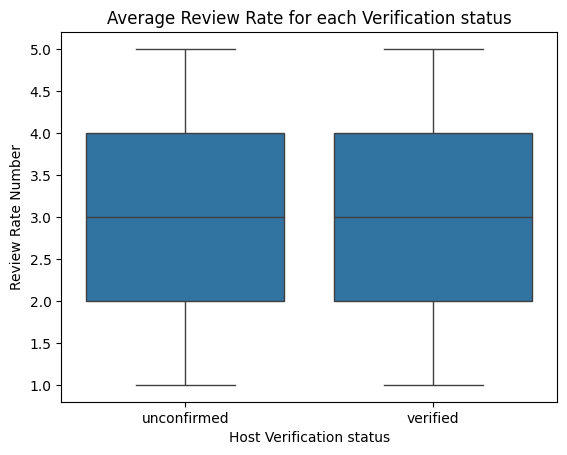

In [28]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color);
plt.xlabel('Host Verification status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each Verification status');

**Average Review Rates: Verified vs. Unconfirmed Hosts**

The analysis reveals that:

Verified hosts have an average review rate of 3.27.
Unconfirmed hosts have an average review rate of 3.28.
This indicates only a marginal difference, with unconfirmed hosts having a slightly higher rate.
It suggests that verified hosts are not necessarily more likely to receive positive reviews compared to unconfirmed hosts.

**Is there any correlation between the price of a listing and and its service fee?**

In [29]:
df['price_$'].corr(df['service fee_$'])

np.float64(0.9999909082976475)

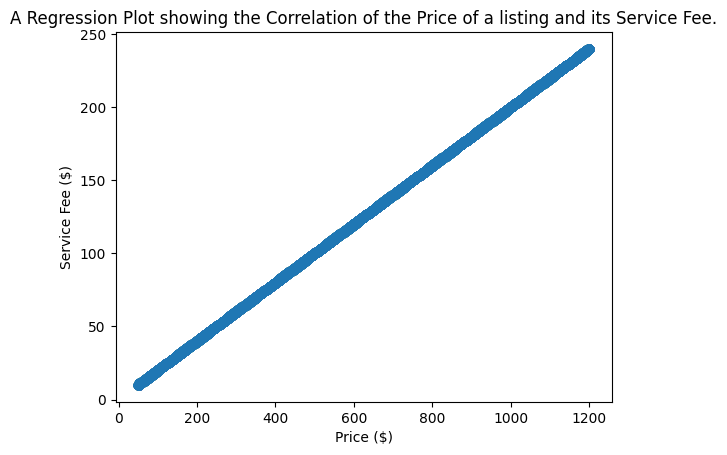

In [30]:
sns.regplot(df, x = 'price_$', y = 'service fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a listing and its Service Fee.');

**Correlation Between Price and Service Fee**

The Pearson correlation coefficient between the price and service_fee is 0.99, indicating a highly robust positive correlation between these variables.

On the regression plot, each point forms a rising diagonal line towards the right, signifying that as the price of a property increases, so does its service fee.

**What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?**

In [31]:
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274773
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

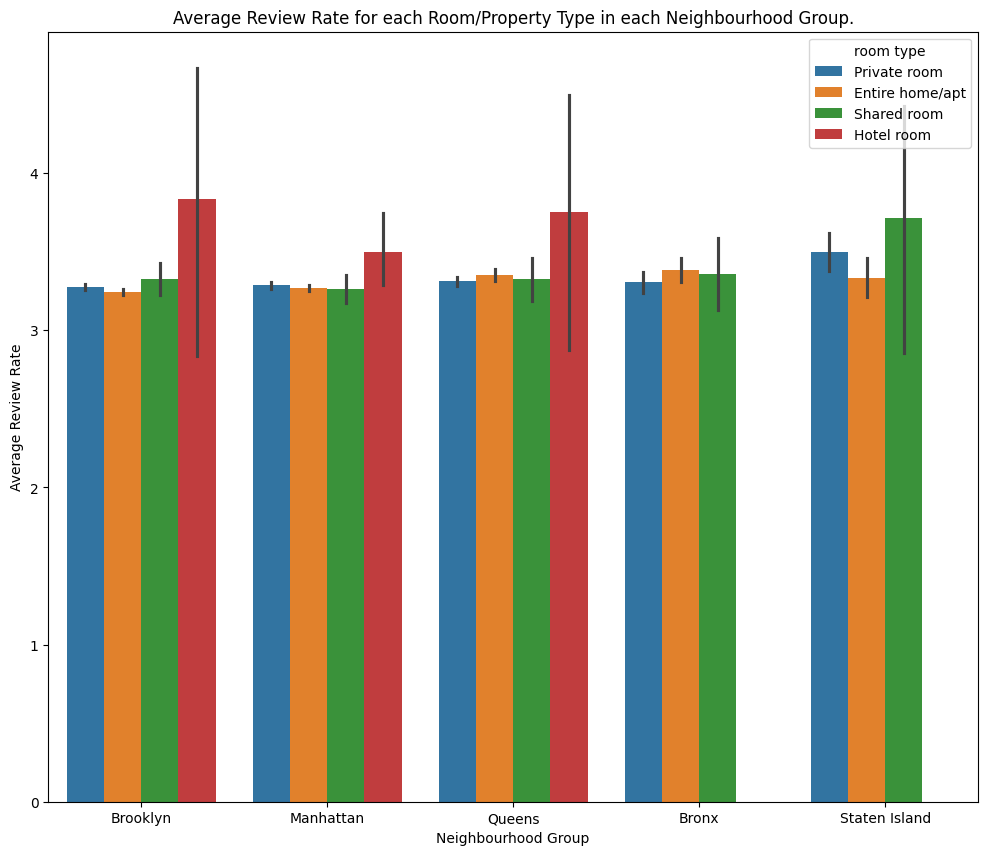

In [32]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

**Review Rates by Property Type**

Hotel rooms exhibit a higher review rate compared to all other property types within the three neighborhood groups where they are located: Brooklyn, Manhattan, and Queens.

**Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?**

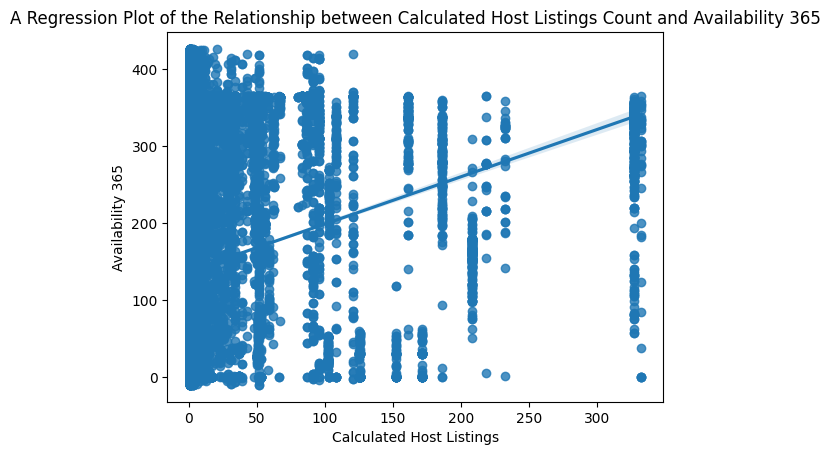

In [33]:
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [34]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.13599714715703384)

**Correlation Between Host Listings and Availability**

The Pearson correlation coefficient for the association between calculated host listings and availability_365 is 0.136, indicating a weak positive correlation between the two variables.

**Conclusion**

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

**Key findings include:**

The dominance of Entire home/apt listings in counts.
Variability in listing counts across neighborhood groups.
A downward trend between property construction year and price.
Insights into the significance of verified host status on review rates.
A strong correlation between listing price and service fee.

**Future directions:**

Conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences, which could inform targeted marketing strategies and product improvements for Airbnb.
Expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, to forecast listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.